## Import Libraries for data preprocessing

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

In [6]:
# Load data from csv
data = pd.read_csv(r'Data/Extracted_MFCCs.csv')
data.head()

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,aggressiveness
0,-581.18304,61.775310,0.334518,8.486256,0.788418,11.279878,-6.216891,0.534891,2.526564,-0.257104,-0.805913,-0.914089,-2.371790,1
1,-574.66840,56.525585,-2.960935,8.754062,1.412463,7.794606,-5.879593,-1.438899,0.365388,-1.025561,-1.278394,-1.151001,-9.105648,1
2,-628.37790,69.173580,-5.179301,4.144491,-2.561467,12.802252,-1.245774,0.469771,1.913076,-0.159788,-1.885625,-7.068508,-4.552937,1
3,-577.23940,67.032510,5.281436,11.227827,3.101099,18.982237,-5.887117,1.355586,6.083599,1.585905,2.887235,3.166880,-1.952211,1
4,-540.83923,89.908420,8.104260,13.206378,1.857440,19.507902,-5.437987,3.933926,7.808056,0.806630,1.848405,-6.200817,-10.122912,1


In [7]:
# Devide to indipendant and dependant variables
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [8]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle=True)

In [9]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2989, 13), (748, 13), (2989,), (748,))

In [10]:
# Scale data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2989, 13), (748, 13), (2989,), (748,))

In [12]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

In [13]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2989, 13, 1), (748, 13, 1), (2989,), (748,))

## Modeling

#### Import Libraries for Model

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv1D,MaxPooling1D
from tensorflow.keras.optimizers import Adam

In [39]:
intializer = tf.keras.initializers.glorot_normal(seed=None)

In [54]:
model = Sequential()
model.add(Conv1D(128, 5,padding='same',
                input_shape=(13,1),kernel_initializer=intializer))
model.add(Activation('relu'))

model.add(Conv1D(128, 5,padding='same',kernel_initializer=intializer))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))

model.add(Conv1D(128, 5,padding='same',kernel_initializer=intializer))
model.add(Activation('relu'))

model.add(Conv1D(128, 5,padding='same',kernel_initializer=intializer))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv1D(128, 5,padding='same',kernel_initializer=intializer))
model.add(Flatten())

model.add(Dense(1,kernel_initializer=intializer))
model.add(Activation('sigmoid'))

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 13, 128)           768       
                                                                 
 activation_14 (Activation)  (None, 13, 128)           0         
                                                                 
 conv1d_7 (Conv1D)           (None, 13, 128)           82048     
                                                                 
 activation_15 (Activation)  (None, 13, 128)           0         
                                                                 
 dropout_8 (Dropout)         (None, 13, 128)           0         
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 128)            0         
 g1D)                                                            
                                                      

In [56]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              optimizer=Adam(learning_rate=0.0001))

In [57]:
model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test),batch_size=32)

Epoch 1/50


94/94 [==============================] - 2s 10ms/step - loss: 0.6029 - accuracy: 0.7789 - val_loss: 0.4378 - val_accuracy: 0.8249
Epoch 2/50
94/94 [==============================] - 1s 6ms/step - loss: 0.3818 - accuracy: 0.8494 - val_loss: 0.3744 - val_accuracy: 0.8463
Epoch 3/50
94/94 [==============================] - 0s 5ms/step - loss: 0.3405 - accuracy: 0.8645 - val_loss: 0.3404 - val_accuracy: 0.8583
Epoch 4/50
94/94 [==============================] - 0s 5ms/step - loss: 0.3032 - accuracy: 0.8765 - val_loss: 0.3151 - val_accuracy: 0.8717
Epoch 5/50
94/94 [==============================] - 1s 5ms/step - loss: 0.2739 - accuracy: 0.8933 - val_loss: 0.2872 - val_accuracy: 0.8877
Epoch 6/50
94/94 [==============================] - 0s 5ms/step - loss: 0.2505 - accuracy: 0.8976 - val_loss: 0.2651 - val_accuracy: 0.8944
Epoch 7/50
94/94 [==============================] - 0s 5ms/step - loss: 0.2376 - accuracy: 0.9020 - val_loss: 0.2445 - val_accuracy: 0.9091
Epoch 8/50
94/94 [============

In [49]:
def show_graphs(history):
    epochs = [i for i in range(50)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    test_acc = history.history['val_accuracy']
    test_loss = history.history['val_loss']

    fig.set_size_inches(30,12)
    ax[0].plot(epochs , train_loss , label = 'Training Loss')
    ax[0].plot(epochs , test_loss , label = 'Testing Loss')
    ax[0].set_title('Training & Testing Loss')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")

    ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
    ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
    ax[1].set_title('Training & Testing Accuracy')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    plt.show()

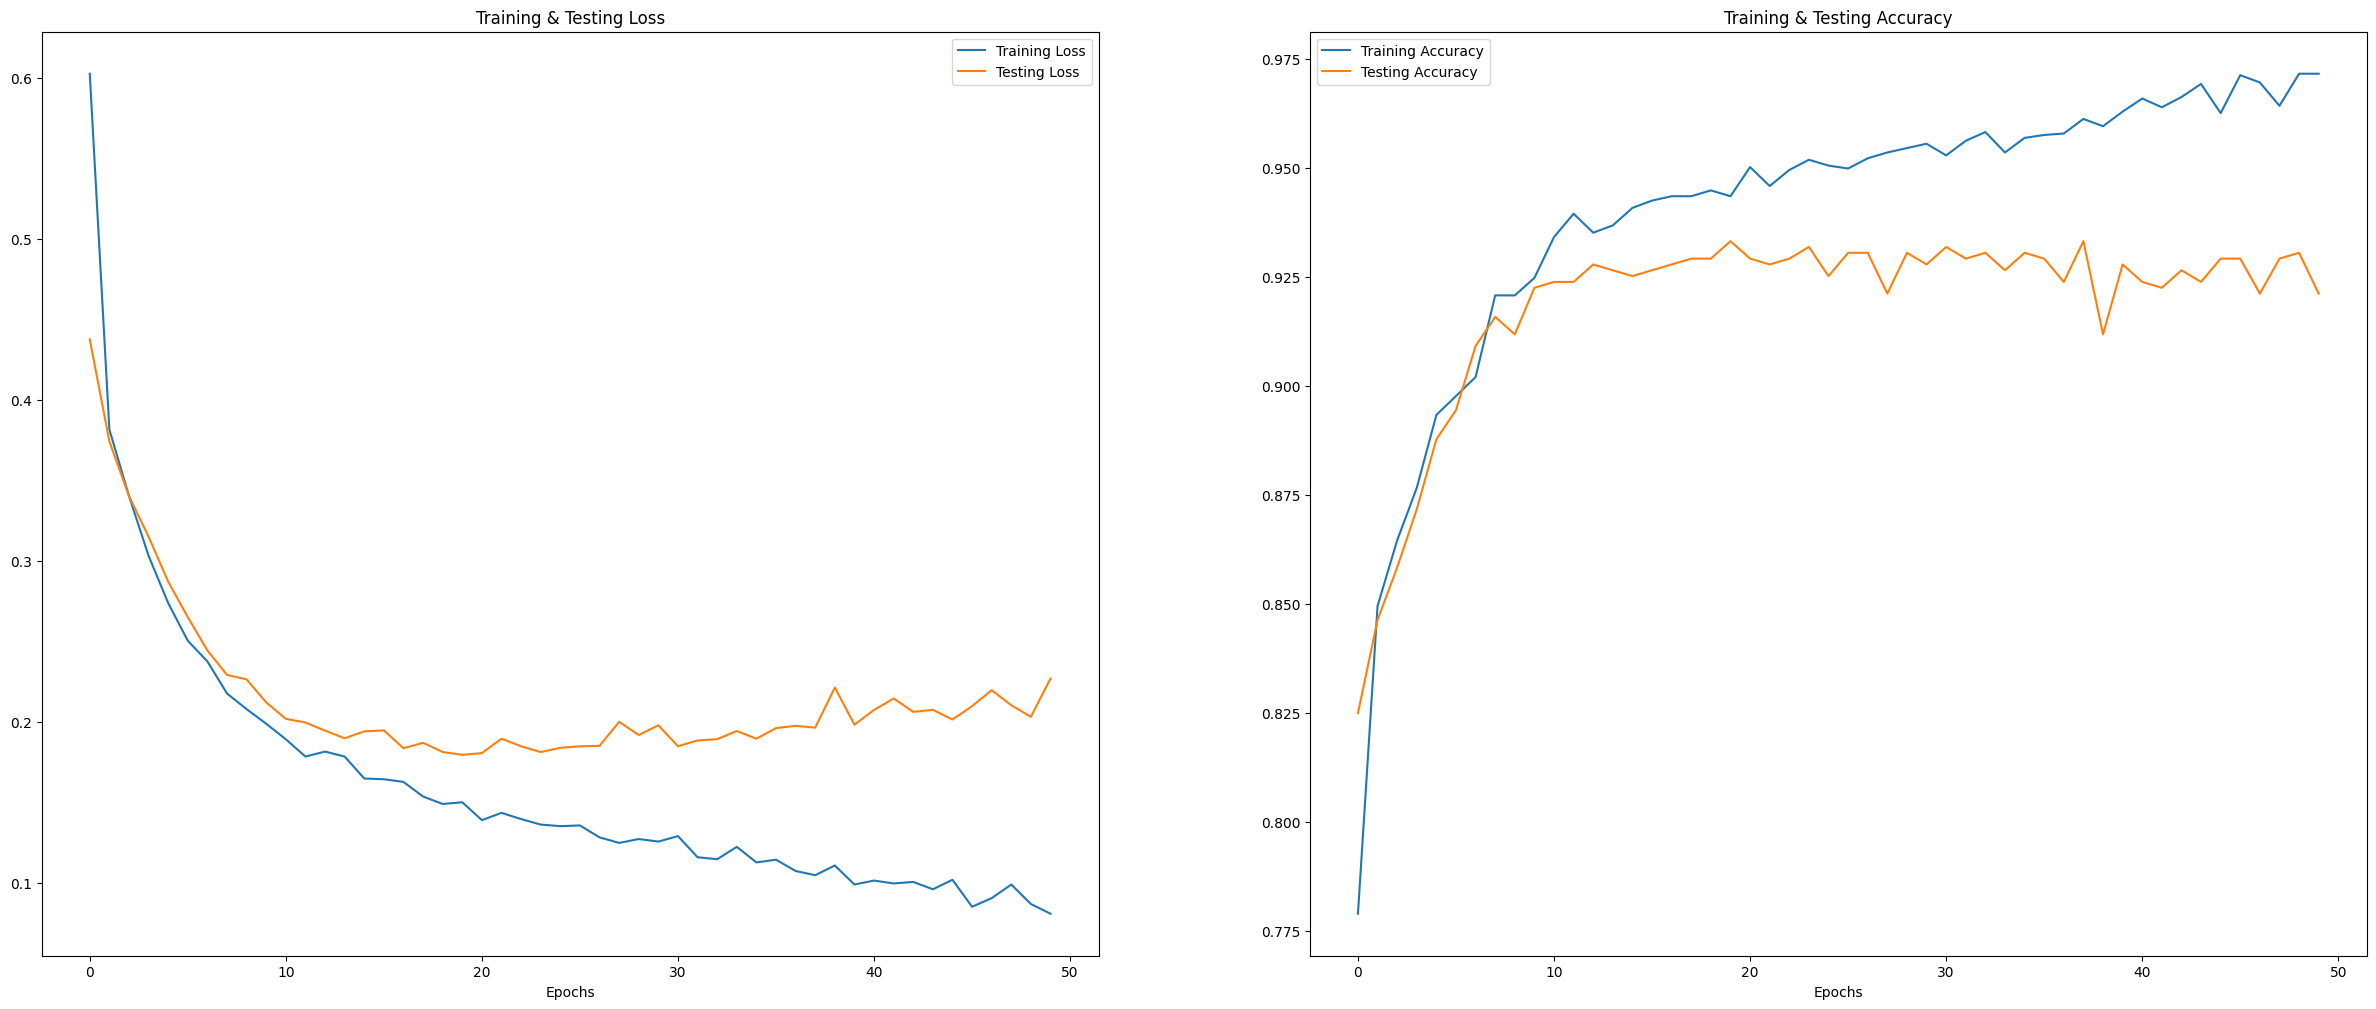

In [58]:
show_graphs(model.history)

In [59]:
y_pred = model.predict(x_test)

24/24 [==============================] - 0s 3ms/step


In [60]:
y_pred = np.array([1 if y>=0.9 else 0 for y in y_pred]) #Threshold

In [61]:
y_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

In [62]:
y_test

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

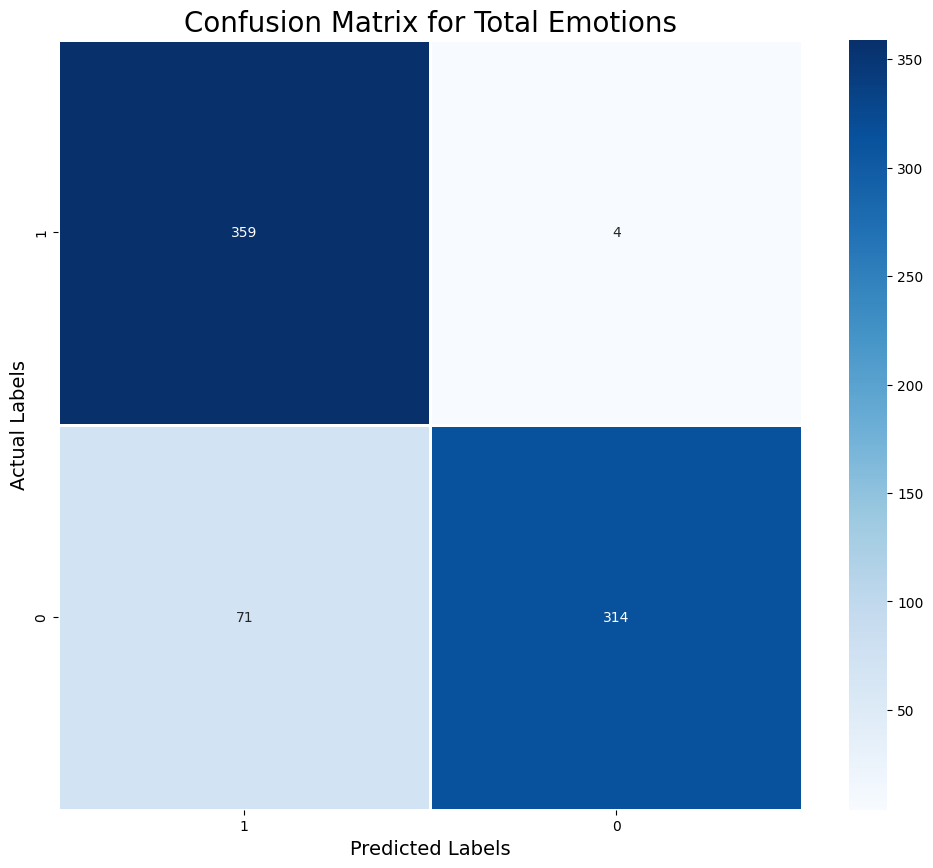

In [63]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [1,0] , columns = [1,0])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Total Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [64]:
accuracy_score(y_test, y_pred)

0.8997326203208557

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.91       363
           1       0.99      0.82      0.89       385

    accuracy                           0.90       748
   macro avg       0.91      0.90      0.90       748
weighted avg       0.91      0.90      0.90       748



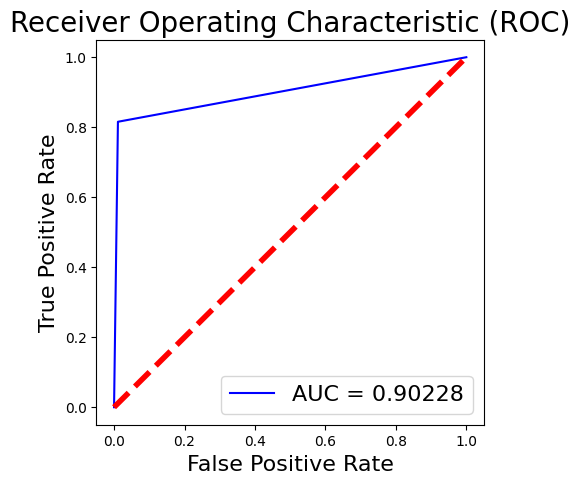

In [74]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic (ROC)', size=20)
plt.plot(fpr, tpr, color='blue', label='AUC = %0.5f' % roc_auc)
plt.legend(loc='lower right', prop={'size': 16})
plt.plot([0, 1], [0, 1], linestyle='--', color='red', linewidth=4, label='Random Chance')
plt.axis('tight')
plt.ylabel('True Positive Rate', size=16)
plt.xlabel('False Positive Rate', size=16)
plt.show()

In [79]:
# Save model
model.save('Models/cnn_model_1.h5')

### Testing

In [80]:
import librosa

In [81]:
def extract_mfcc(signal, sample_rate=22050, n_mfcc=13, n_fft=2048, hop_length=512):
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    return np.mean(mfccs.T, axis=0)

In [84]:
signal, sample_rate = librosa.load(r"Test Audio\aggressive.mp3", sr=22050)

C:\Users\94777\AppData\Local\Temp\ipykernel_10564\2867304186.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sample_rate = librosa.load(r"Test Audio\aggressive.mp3", sr=22050)
d:\DSGP\Main\AggroDetect_DSGP\.venv\lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [89]:
features = extract_mfcc(signal)
# Scale data
features = sc.transform(features.reshape(1,-1))
features = np.expand_dims(features, axis=2)

In [90]:
model.predict(features)

1/1 [==============================] - 0s 25ms/step


array([[0.9999688]], dtype=float32)

In [91]:
signal, sample_rate = librosa.load(r"Test Audio\non-aggressive.mp3", sr=22050)

C:\Users\94777\AppData\Local\Temp\ipykernel_10564\3221522228.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sample_rate = librosa.load(r"Test Audio\non-aggressive.mp3", sr=22050)
d:\DSGP\Main\AggroDetect_DSGP\.venv\lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [92]:
features = extract_mfcc(signal)
# Scale data
features = sc.transform(features.reshape(1,-1))
features = np.expand_dims(features, axis=2)

In [93]:
model.predict(features)

1/1 [==============================] - 0s 30ms/step


array([[0.9999394]], dtype=float32)

In [97]:
signal, sample_rate = librosa.load(r"Audio Dataset\Male\Non-Aggressive\03-01-01-01-01-02-07.wav", sr=22050)

In [98]:
features = extract_mfcc(signal)
# Scale data
features = sc.transform(features.reshape(1,-1))
features = np.expand_dims(features, axis=2)

In [99]:
model.predict(features)

1/1 [==============================] - 0s 30ms/step


array([[0.00019688]], dtype=float32)